# Collaberative Filtering

In [1]:
from fastai import *
from fastai.collab import *
from fastai.tabular import *

In [22]:
user, item, title = 'userId', 'movieId', 'title'

In [4]:
path = untar_data(URLs.ML_SAMPLE) # Movie Lens dataset sample
path

PosixPath('/home/jupyter/.fastai/data/movie_lens_sample')

In [5]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/movie_lens_sample/ratings.csv')]

In [6]:
ratings = pd.read_csv(path/'ratings.csv')

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [9]:
data = CollabDataBunch.from_df(ratings, seed = 42)

In [10]:
y_range = [0, 5.5]

In [11]:
learn = collab_learner(data, n_factors = 50, y_range = y_range)

In [12]:
learn.fit_one_cycle(4, 5e-3)

epoch,train_loss,valid_loss
1,1.752976,1.231809
2,0.897491,0.689552
3,0.673458,0.661860
4,0.595642,0.656554


## Now covering the whole dataset of MovieLens

Which consists of 100k data items available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [4]:
path = Path('data/movielens')

In [5]:
path.mkdir(parents=True, exist_ok=True)

In [6]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip -P {path}

--2018-12-03 12:17:24--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘data/movielens/ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  25.4MB/s    in 0.2s    

2018-12-03 12:17:24 (25.4 MB/s) - ‘data/movielens/ml-100k.zip’ saved [4924029/4924029]



In [9]:
man unzip

In [13]:
! unzip -q -n {path}/ml-100k.zip -d {path}

# Here -q performs operations quietly without giving the summaries or prining the file names
# And -n doesn't overwrite if a file exists. Never (n)
# -d is as usual, asking for the directory where to download

In [18]:
path = Path('data/movielens/ml-100k')

In [19]:
path.ls()

[PosixPath('data/movielens/ml-100k/README'),
 PosixPath('data/movielens/ml-100k/u4.test'),
 PosixPath('data/movielens/ml-100k/u.genre'),
 PosixPath('data/movielens/ml-100k/u.item'),
 PosixPath('data/movielens/ml-100k/u5.base'),
 PosixPath('data/movielens/ml-100k/ub.test'),
 PosixPath('data/movielens/ml-100k/u5.test'),
 PosixPath('data/movielens/ml-100k/u.info'),
 PosixPath('data/movielens/ml-100k/ub.base'),
 PosixPath('data/movielens/ml-100k/ua.test'),
 PosixPath('data/movielens/ml-100k/u1.test'),
 PosixPath('data/movielens/ml-100k/u.occupation'),
 PosixPath('data/movielens/ml-100k/u.user'),
 PosixPath('data/movielens/ml-100k/u2.base'),
 PosixPath('data/movielens/ml-100k/u.data'),
 PosixPath('data/movielens/ml-100k/ua.base'),
 PosixPath('data/movielens/ml-100k/allbut.pl'),
 PosixPath('data/movielens/ml-100k/u3.base'),
 PosixPath('data/movielens/ml-100k/u4.base'),
 PosixPath('data/movielens/ml-100k/u1.base'),
 PosixPath('data/movielens/ml-100k/u2.test'),
 PosixPath('data/movielens/ml-10

In [23]:
ratings = pd.read_csv(path/'u.data', delimiter = '\t', header = None,
                     names = [user, item, 'rating', 'timestamp'])

In [24]:
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [25]:
movies = pd.read_csv(path/'u.item', delimiter = '|', encoding = 'latin-1', header = None,
                    names = [item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])

In [26]:
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
len(ratings)

100000

In [28]:
len(movies)

1682

In [29]:
rating_movie = ratings.merge(movies[[item, title]])

In [30]:
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [31]:
data = CollabDataBunch.from_df(rating_movie, seed = 42, pct_val = 0.1, item_name = title)

In [32]:
data.show_batch()

userId,title,target
23,Babe (1995),4.0
13,"Shadow, The (1994)",5.0
387,Carlito's Way (1993),3.0
151,"Sting, The (1973)",4.0
741,"Fugitive, The (1993)",4.0


In [33]:
y_range = [0, 5.5]

In [34]:
learn = collab_learner(data, n_factors = 40, y_range = y_range, wd = 1e-1)

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


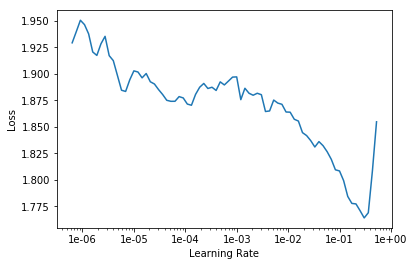

In [37]:
learn.recorder.plot(skip_end = 15)

In [39]:
learn.recorder.plot??

In [40]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss
1,0.941422,0.958181
2,0.861357,0.889940
3,0.771895,0.835397
4,0.659281,0.813659
5,0.551356,0.813588


In [41]:
learn.save('dotprod')

# Interpretation

In [43]:
learn.load('dotprod');

In [44]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)